## Convolutional Neural Network with MNIST dataset

## Import Classes and Functions

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as K
from keras.utils import to_categorical
from livelossplot import PlotLossesKeras

Using TensorFlow backend.


## Initialize Random Number Generator

In [2]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [3]:
num_classes = 10

# input image dimensions
img_rows, img_cols = 28, 28

## Load The Dataset
The data, shuffled and split between train and test sets

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

### Plot the first few examples 

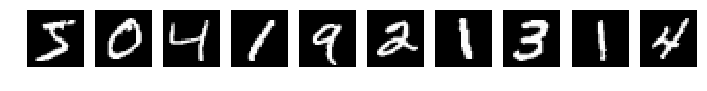

In [5]:
plt.figure(figsize=(12,3))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i].reshape((img_rows, img_cols)), cmap='gray', interpolation='nearest')
    plt.axis('off')

### Reshape the data

In [6]:
if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

### Normalize the data

In [7]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


### Convert class vectors to binary class matrices

In [8]:
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

## Define The Neural Network Model

In [9]:
def create_model():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='Adadelta', metrics=['accuracy'])
    return model

### Create the Model

In [10]:
model = create_model()

## Define training parameters

In [11]:
batch_size = 128
epochs = 5

## Train the model

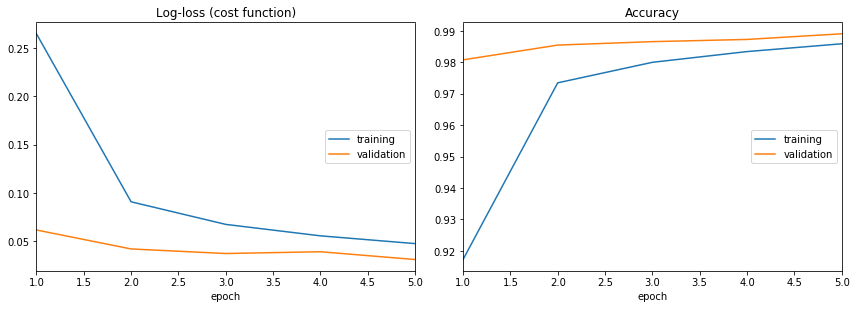

In [12]:
model.fit(X_train, y_train, batch_size=batch_size, 
          epochs=epochs, verbose=1, validation_data=(X_test, y_test), callbacks=[PlotLossesKeras()])

In [13]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.03102881237089168
Test accuracy: 0.9891
